In [82]:
import pandas as pd
import numpy as np
import panel as pn
pn.extension('tabulator')

import matplotlib.pyplot as plt
import hvplot.pandas

In [83]:
df_approach = pd.read_csv('./datasets/approach.csv')
df_asteroid = pd.read_csv('./datasets/asteroid.csv')

In [84]:
# 1. **Classificazione degli asteroidi in base al diametro**
def assign_size_category(diameter):
    if diameter < 0.35:
        return 'Small'
    elif 0.14 <= diameter < 1:
        return 'Medium'
    else:
        return 'Large'

df_asteroid['size_category'] = df_asteroid['estimated_diameter_km_max'].apply(assign_size_category)

In [85]:
# 2. **Calcolo della percentuale di asteroidi pericolosi per categoria di dimensione**
per_category = df_asteroid.groupby('size_category')['is_potentially_hazardous_asteroid'].mean() * 100
per_category = per_category[['Small', 'Medium', 'Large']]
print(per_category)

size_category
Small      7.441608
Medium    25.705205
Large     19.322599
Name: is_potentially_hazardous_asteroid, dtype: float64


In [94]:
# Calcolo il numero di asteroidi per ogni categoria
per_category_size = df_asteroid.groupby('size_category').size()
per_category_size.head()

size_category
Large     1801
Medium    2517
Small     3682
dtype: int64

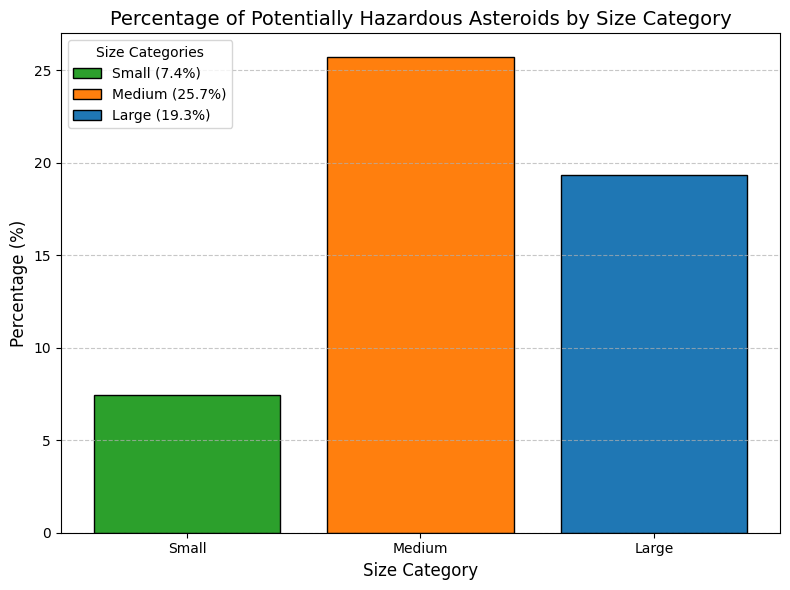

In [87]:
categories = ['Small', 'Medium', 'Large']
per_category = per_category.reindex(categories, fill_value=0)

plt.figure(figsize=(8, 6))
colors = ['#2ca02c', '#ff7f0e', '#1f77b4']
bars = plt.bar(per_category.index, per_category.values, color=colors, edgecolor='black')

plt.title('Percentage of Potentially Hazardous Asteroids by Size Category', fontsize=14)
plt.xlabel('Size Category', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xticks(rotation=360, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar, category, color in zip(bars, categories, colors):
    bar.set_label(f'{category} ({per_category[category]:.1f}%)')
plt.legend(title='Size Categories', fontsize=10, loc='upper left')

plt.tight_layout()
plt.show()

In [89]:
# 4. **Elabora gli approcci degli asteroidi nel tempo**
df_approach['close_approach_date'] = pd.to_datetime(df_approach['close_approach_date'])
neos_per_year = df_approach.groupby(df_approach['close_approach_date'].dt.year).size()
print("data from:", neos_per_year.index.min(), "to:", neos_per_year.index.max())

data from: 1990 to: 2040


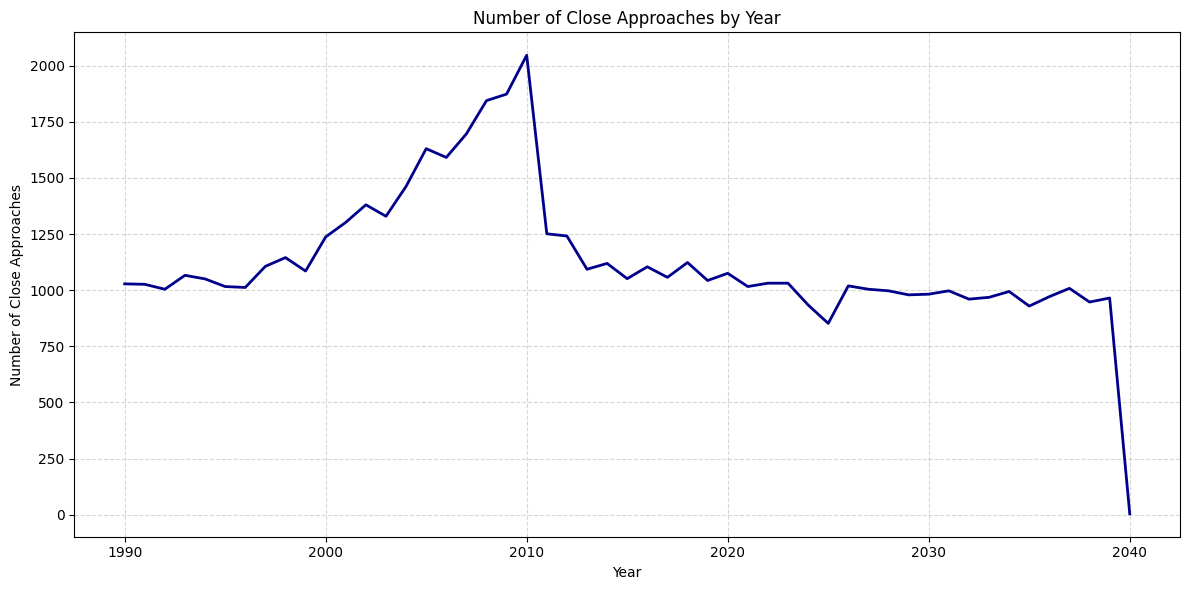

In [90]:
# 5. **Visualizzazione del numero di approcci per anno**
plt.figure(figsize=(12, 6))
neos_per_year.plot(kind='line', color='darkblue', linewidth=2)
plt.title('Number of Close Approaches by Year')
plt.xlabel('Year')
plt.ylabel('Number of Close Approaches')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [91]:
# 6. **Calcolo della percentuale di asteroidi pericolosi per anno senza duplicati**
merge = pd.merge(df_approach, df_asteroid, how='left', left_on='asteroid_id', right_on='id')
merge['year'] = merge['close_approach_date'].dt.year
unique_asteroids_per_year = merge.drop_duplicates(subset=['asteroid_id', 'year'])
haz_per_year = unique_asteroids_per_year.groupby('year')['is_potentially_hazardous_asteroid'].mean() * 100
haz_per_year.head()

year
1990    24.773756
1991    23.732719
1992    24.078341
1993    24.208145
1994    24.296963
Name: is_potentially_hazardous_asteroid, dtype: float64

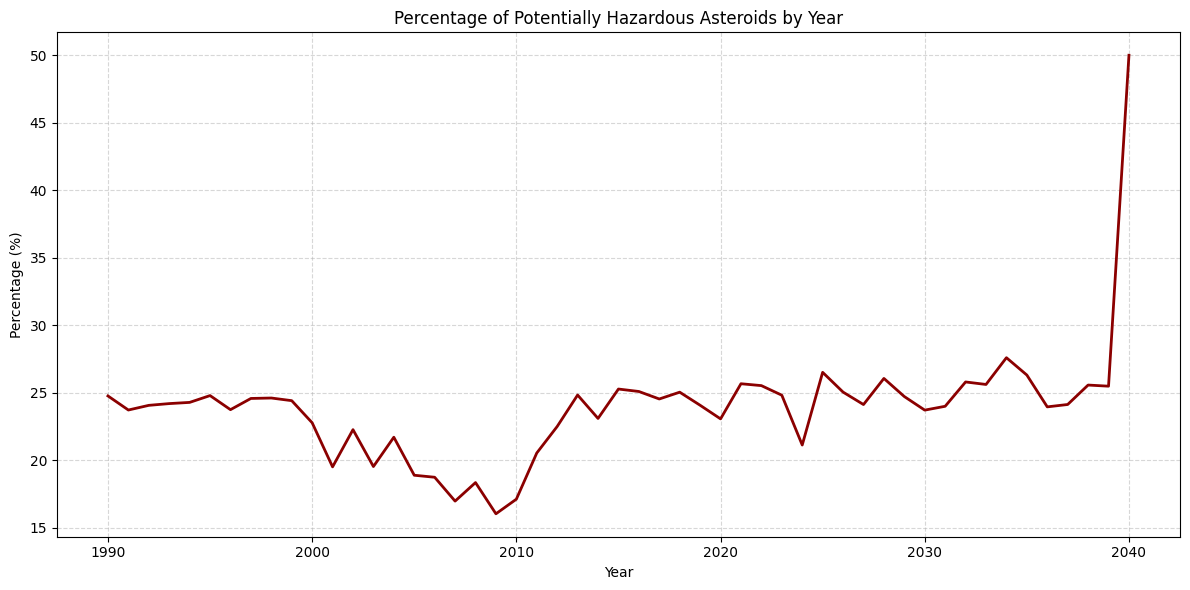

In [92]:
# 7. **Visualizzazione della percentuale di asteroidi pericolosi per anno**
plt.figure(figsize=(12, 6))
haz_per_year.plot(kind='line', color='darkred', linewidth=2)
plt.title('Percentage of Potentially Hazardous Asteroids by Year')
plt.xlabel('Year')
plt.ylabel('Percentage (%)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

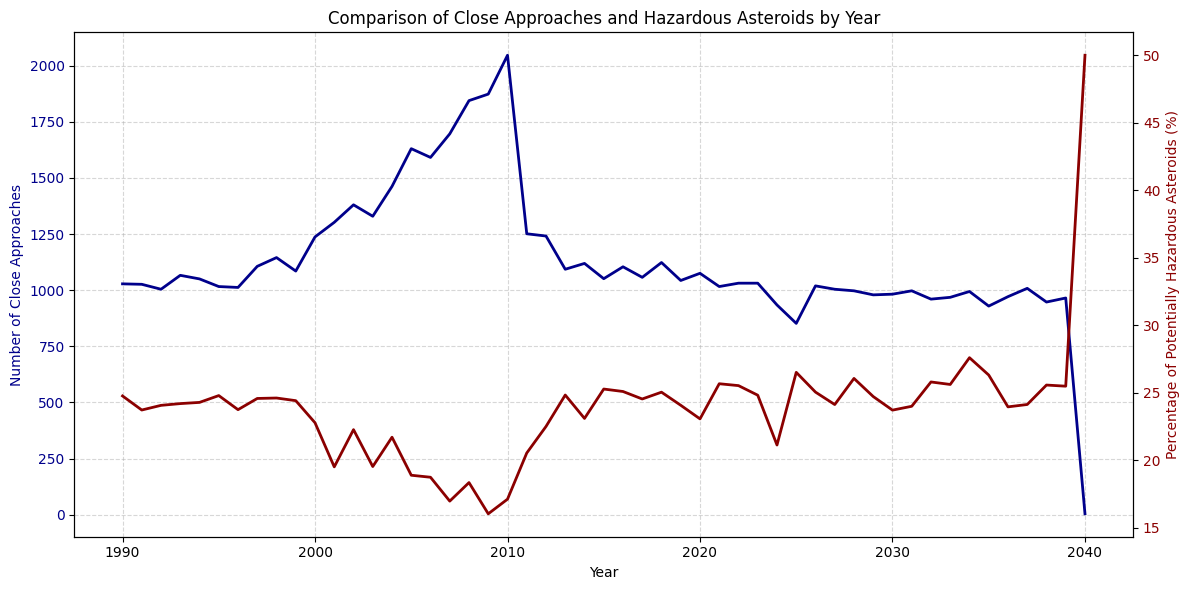

In [93]:
# 8. **Creazione del grafico con due assi Y per sovrapporre i due grafici**
fig, ax1 = plt.subplots(figsize=(12, 6))

# Grafico del numero di approcci per anno (primo asse Y)
ax1.plot(neos_per_year.index, neos_per_year, color='darkblue', linewidth=2)
ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Close Approaches', color='darkblue')
ax1.tick_params(axis='y', labelcolor='darkblue')
ax1.grid(True, linestyle='--', alpha=0.5)

# Creazione del secondo asse Y
ax2 = ax1.twinx()

# Grafico della percentuale di asteroidi pericolosi per anno (secondo asse Y)
ax2.plot(haz_per_year.index, haz_per_year, color='darkred', linewidth=2)
ax2.set_ylabel('Percentage of Potentially Hazardous Asteroids (%)', color='darkred')
ax2.tick_params(axis='y', labelcolor='darkred')

# Titolo del grafico
plt.title('Comparison of Close Approaches and Hazardous Asteroids by Year')

# Layout
plt.tight_layout()
plt.show()